In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

import warnings
warnings.filterwarnings('ignore')

In [175]:
train_df = pd.read_csv('data/train_dataframe.csv')
train_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,279.0,8.2,55.0,1140.0,8.0,13.0,462.0,51.492733,-0.157371,4.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13647,641.0,8.7,0.0,2130.0,5.0,3.0,338.0,51.542605,-0.007271,8.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
13648,359.0,9.3,45.0,1694.0,28.0,9.0,452.0,51.508236,-0.126196,5.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
13649,704.0,8.3,16.0,2443.0,24.0,19.0,179.0,51.491959,-0.220096,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [176]:
test_df = pd.read_csv('data/test_dataframe.csv')
test_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,788.0,8.5,40.0,2635.0,7.0,7.0,150.0,51.512763,-0.099716,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3409,377.0,8.5,27.0,1363.0,4.0,1.0,501.0,51.515864,-0.120063,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3410,1427.0,8.8,0.0,4305.0,4.0,1.0,48.0,51.557696,-0.283526,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3411,1258.0,9.4,20.0,4204.0,31.0,3.0,62.0,51.502435,-0.000250,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# 1.1) Fit a logistic regression model to this data with the solver set to lbfgs. 
# What is the accuracy score on the test set?

In [5]:
#THIS TAKES A LONG TIME TO RUN!

from sklearn.linear_model import LogisticRegression

X_train = train_df.iloc[:,:-1]
y_train = train_df.Reviewer_Score

X_test = test_df.iloc[:,:-1]
y_test = test_df.Reviewer_Score

best_lbfgs =[]
for i in range(1,4000, 100):
    logreg = LogisticRegression(solver='lbfgs', max_iter=i) 
    logreg.fit(X_train, y_train)

    best_lbfgs.append(logreg.score(X_train,y_train))
print(best_lbfgs)


[0.5811295875760017, 0.7258076331404293, 0.7378214050252728, 0.7507874880961102, 0.7490293751373526, 0.7481503186579738, 0.7482235733645887, 0.7486631016042781, 0.7541572046003956, 0.769980221229214, 0.7688814006299904, 0.7691011647498351, 0.7701267306424437, 0.7703464947622884, 0.7732034283202696, 0.7830928137132811, 0.7827265401802066, 0.7820672478206725, 0.7796498425023808, 0.7789905501428467, 0.7792103142626914, 0.7785510219031573, 0.7820672478206725, 0.7801626254486851, 0.7790638048494616, 0.7811149366346788, 0.7819207384074427, 0.7818474837008278, 0.7814812101677533, 0.7811881913412937, 0.7811149366346788, 0.7815544648743682, 0.7814812101677533, 0.7808219178082192, 0.780968427221449, 0.7814812101677533, 0.7843381437257344, 0.7854369643249579, 0.784631162552194, 0.7852172002051132]


In [6]:
# When we set the solver to lbfgs, then we should determine the max itteration number.
# I have tried for 4000 times itteration in the above code, but after 3*100 itterations, 
# it's not too much difference between train scores.
# Even it has some fluctuations and takes so much time.
# Because every step was 100 itteration then the optimize number for max_iter is 300.
# In my oponion it doesn't worth to waste more time after 300 itterations in this dataframe.


In [177]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.Reviewer_Score

X_test = test_df.iloc[:,:-1]
y_test = test_df.Reviewer_Score

In [158]:
# Because the previous loop takes so much time to run every time, I had to define the below codes once again. 

from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(solver='lbfgs', max_iter=300) 
logreg.fit(X_train, y_train)

logreg.score(X_train,y_train)

0.7507874880961102

In [159]:
%%timeit 
[logreg.score(X_train,y_train)]

64.1 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [160]:
logreg.score(X_test,y_test)

0.7600351596835628

In [10]:
# 1.2) What are the 20 words most associated with a good review? What are the 20 words most associated with a bad review?
# Use the regression coefficients to answer this question

In [11]:
coefficients = logreg.coef_
coefficients

array([[-2.19299764e-05,  1.17728177e+00, -3.91780699e-02, ...,
         2.38929789e-04, -1.09739033e-03,  4.90621622e-04]])

In [12]:
indices = coefficients.argsort()[0]
indices

array([2294, 2155, 1366, ..., 2432, 1158,    1], dtype=int64)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer()
bagofwords.fit(X_train)

# The words with the lowest coefficients 
# most predictive of a 0 (negative review)

np.array(bagofwords.get_feature_names())[indices[:20]]

array(['p_receptionist', 'p_milk', 'n_signs', 'p_housekeeping',
       'cannizaro', 'n_stopped', 'n_car', 'n_simple', '82', 'n_tasted',
       'n_calls', 'p_perfectly', 'angel', 'n_realise', 'n_peeling',
       'n_used', 'n_use', 'n_drink', 'domenico', 'george'], dtype='<U42')

In [14]:
# The words with the highest coefficients
# most predictive of a 1 (positive review)

np.array(bagofwords.get_feature_names())[indices[-20:]]

array(['p_sleep', 'p_public', 'p_cake', 'p_slept', 'p_special', 'p_think',
       'p_happy', 'academy', 'p_king', 'p_generally', 'p_bed',
       'p_italian', 'p_hyde', 'hotel_name_portobello',
       'hotel_name_conrad', 'p_movies', 'p_forward', 'p_terrace',
       'n_parking', '55'], dtype='<U42')

In [15]:
# 1.3) Reduce the dimensionality of the dataset using PCA, 
# what does reducing the dimensionality do to the computation time and why?

In [16]:
from sklearn.decomposition import PCA

In [17]:
X_train.shape

(13651, 2586)

In [18]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
my_pca = PCA(n_components=2586)
my_pca.fit(X_train)

X_PCA = my_pca.transform(X_train)

In [20]:
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[2.49711543e-03 1.82082097e-03 1.61296613e-03 ... 2.26404801e-34
 1.57778211e-34 1.48963359e-34]


<Figure size 432x288 with 0 Axes>

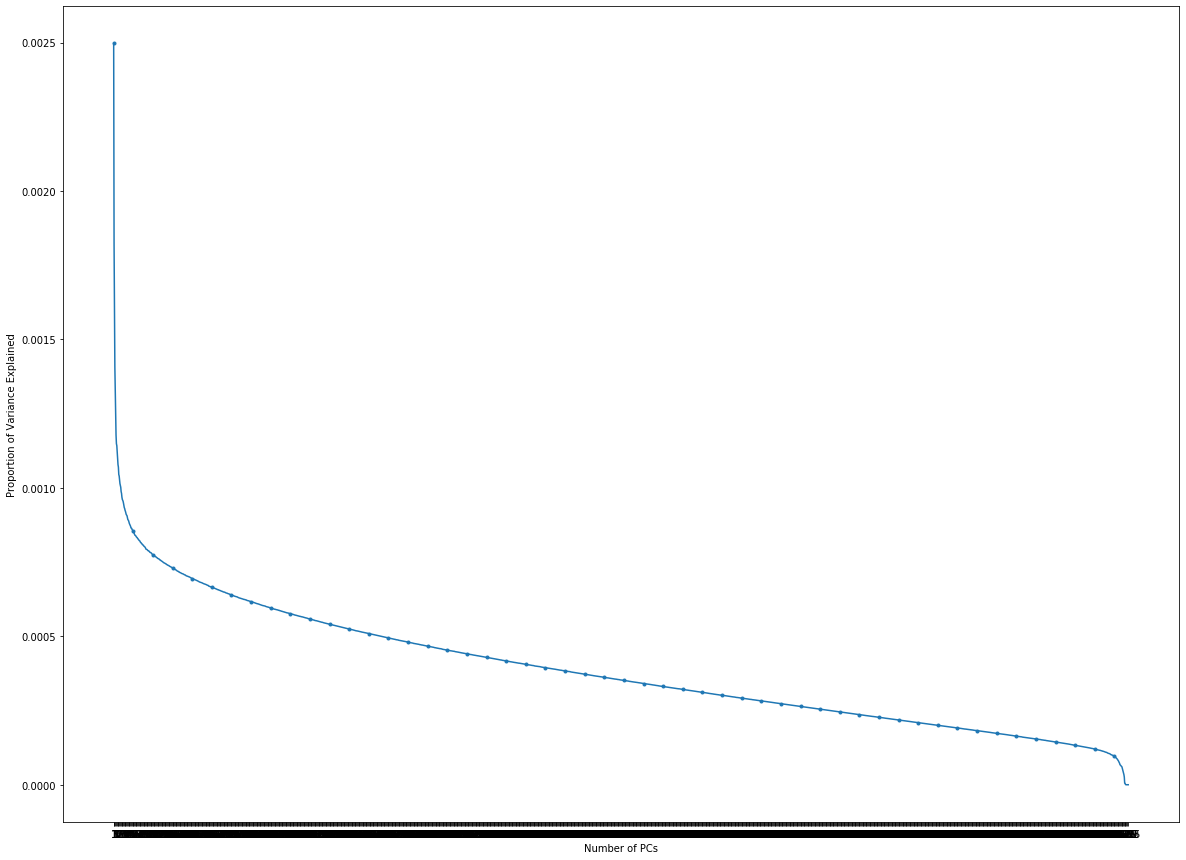

In [21]:
plt.figure()
f, ax = plt.subplots(figsize=(20,15))
plt.plot(range(1,2587),expl_var,marker='.', markevery= 50)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,2587,2))
plt.show()

In [22]:
#Based on the plot above, there is no right answer, as there is no sharp elbow in the plot. But, it seems like after 4 marker points, 
#we are no longer adding that much information by including more PCs.
# So, because every marker is  indicating 50 pcs, then 4*50=200 and PCA is 200.

In [23]:
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.00249712 0.00431794 0.0059309  ... 1.         1.         1.        ]


<Figure size 432x288 with 0 Axes>

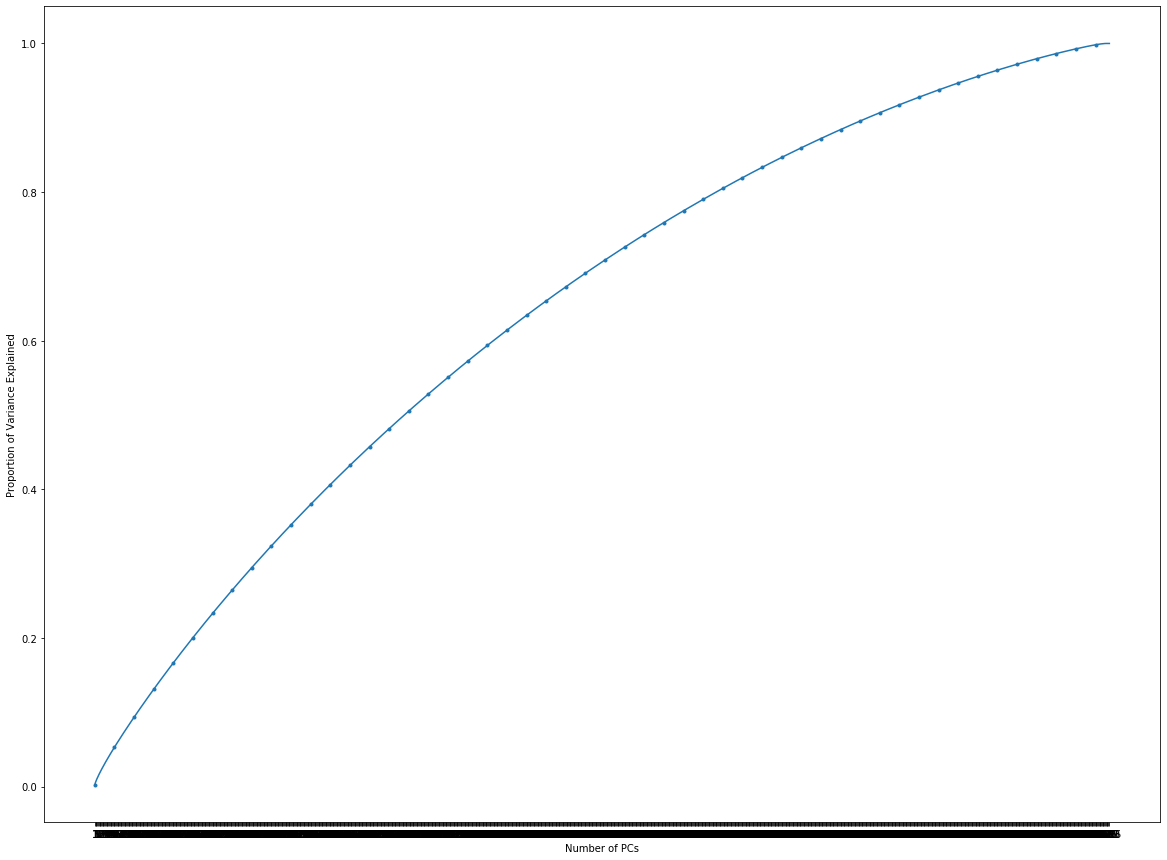

In [24]:
plt.figure()
f, ax = plt.subplots(figsize=(20,15))
plt.plot(range(1,2587),expl_var_cumulative,marker='.',markevery= 50)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,2587,2))
plt.show()

In [25]:
my_pca = PCA(n_components=200)
my_pca.fit(X_train)

X_train_PCA = my_pca.transform(X_train)

X_test_PCA = my_pca.transform(X_test)

In [26]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_PCA, y_train)

print(f'The train accuracy is: {logistic_regression_model.score(X_train_PCA,y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_PCA,y_test):0.3f}')


The train accuracy is: 0.795
The test accuracy is: 0.780


In [150]:
%%timeit
logistic_regression_model.score(X_train_PCA,y_train)

5.97 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# After PCA, computation time has reduced from 64.1 ms to 5.97!

In [27]:
#1.4) List one advantage and one disadvantage of dimensionality reduction

In [28]:
# Using the full original features should be find the better accuracy, however, we got a slightly worse accuracy here!!
# PCA is essentially discarding information by compressing/projecting our data down into a lower dimensionality.
# we got almost a better results by using 200-dimensional data rather than 2587-dimensional data!! 

# But the execution time in PCA is so better.
# The PCA in this case was an improvment but isn't always the same, it can sometimes help and sometimes hurt. 
# In general there are many tasks where it is of great benefit, and sometimes it is necessary. 
# Often the only way to find out what works is to experiment and try various methods.

In [29]:
# 2) Employ a K-Nearest Neighbour classifier on this dataset:

# 2.1) Fit a KNN model to this data. What is the accuracy score on the test set?

In [30]:
#THIS TAKES A LONG TIME TO RUN!


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


my_mms = MinMaxScaler()
X_train_knn = my_mms.fit_transform(X_train)
X_test_knn = my_mms.transform(X_test)


my_knn = KNeighborsClassifier()
my_knn.fit(X_train_knn, y_train)
    
my_knn.score(X_test_knn, y_test)
   

0.6522121300908292

In [31]:
# 2.2) KNN is a computationally expensive model. What does reducing the number of data points do to computation time and why? 
# Should you reduce the number of points in the train set, test set, or both?

In [32]:
# KNN is built around the idea data points that are close to each other are likely members of the same class. 
# KNN does not have a phase where we fit some parameters to the test data. Instead, the fitting phase just involves taking 
# the training data (dependent and independent variables) and remembering where they are. 
# When the prediction phase happens, the model directly compares these saved points to the new points to be predicted.
# The KNN classifier essentially follows this logic. When trying to classify a point 𝑥 it looks at the class of the 𝐾 
# nearest points in the training set, and classifies 𝑥 as the most frequent class in that set.


# Because, the fitting phase just involves taking the training data, therefore reducing the number of data points in the 
# train set will reduce our computation time.


In [33]:
# 2.3) List one advantage and one disadvantage of reducing the number of data points.

In [ ]:
# According to the above statement, when the data points are less also near each other, it put them in the same class and it 
# will reduce the computation time.

# Disadvantage is whenever we have more data points in the past, our model will be more accurate and our perdication 
# will be better. So, when the data points are less, our perdiction won't be good enough.

In [34]:
# 2.4) Use the dataset to find an optimal value for K in the KNN algorithm. 
# You will need to split your dataset into train and validation sets.

In [35]:
from sklearn.model_selection import train_test_split

X_train_knn2, X_validation, y_train_knn2, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state=1)


In [36]:
X_validation.shape

(2731, 2586)

In [37]:
X_train_knn2.shape

(10920, 2586)

In [38]:
#THIS TAKES A LONG LONG TIME TO RUN!

accuracy_scores = []
neighbors = [i for i in range(1, 15)]

my_mms = MinMaxScaler()
X_train_knn2 = my_mms.fit_transform(X_train_knn2)
X_validation = my_mms.transform(X_validation)

for K in neighbors:
    my_knn = KNeighborsClassifier(n_neighbors=K, weights='uniform')
    my_knn.fit(X_train_knn2, y_train_knn2)
    
    accuracy_scores.append(my_knn.score(X_validation, y_validation))
    if (K % 5 == 0):
        print(f'Checking for K={K}')

Checking for K=5
Checking for K=10


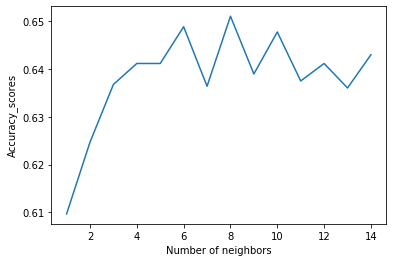

In [162]:
plt.figure()
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy_scores')
plt.show()

In [ ]:
# The above graph shows that after 8 neighbors point the accuracy decreased, So the optimal K=8

In [161]:
my_knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')
my_knn.fit(X_train_knn2, y_train_knn2)
    
my_knn.score(X_validation, y_validation)

0.6558037348956426

In [40]:
# 2.5) What is the issue with splitting the data into train and validation sets after performing a TF-IDF vectorization?

In [42]:
# Running the TF-IDF vectorizer will weigh terms by their inverse frequency in the corpus. 
# If we run it first, it will cause to "leak" some information from our train or validation set into our model, 
# and it will overfit due to leakage


In [43]:
# 3) Employ a Decision Tree classifier on this dataset:

In [45]:
# 3.1) Fit a decision tree model to this data. What is the accuracy score on the test set?

In [46]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.7034866686199824


In [47]:
# 3.2) Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. 
# You will need to split your data set into train and validation.

In [48]:
X_train_dt, X_validation, y_train_dt, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

In [49]:
train_accuracies = []
validation_accuracies = []
depths = []

for d in range(1, 30):
    my_dt = DecisionTreeClassifier(max_depth=d, random_state=1)
    my_dt.fit(X_train_dt, y_train_dt)

    train_accuracy = my_dt.score(X_train_dt, y_train_dt)
    validation_accuracy = my_dt.score(X_validation, y_validation)

    depths.append(d)
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)

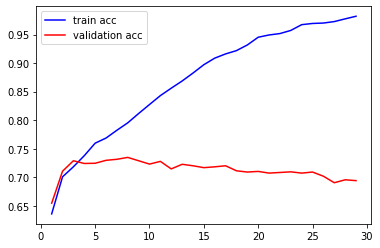

In [50]:
plt.figure()
plt.plot(depths, train_accuracies, c="blue", label="train acc")
plt.plot(depths, validation_accuracies, c="red", label="validation acc")
plt.legend()
plt.show()

In [51]:
max_value_index = np.argmax(validation_accuracies)
max_value_index

7

In [52]:
depths[max_value_index]

8

In [53]:
# 3.3) Provide two advantages of decision trees over KNN.

In [54]:
#1. The computation time is faster
#2. The accuracy score is better.

In [55]:
# 4) What is the purpose of the validation set, i.e., how is it different than the test set?

In [56]:
# In reality because we do not want to use our test data frame (do not overfit it), and we need to know which model is best suited to
# our data, therefore we split our train data frame to the validation part (same as test part) for finding the best model. After that, we will check
# the model for test data and use them for whole data.
# How we divide our data between the train and validation set can have a massive impact on model selection, hence,
# on model performance. 


In [57]:
# 5) Re-run a decision tree or logistic regression on the data again:

In [58]:
# 5.1) Perform a 5-fold cross validation to optimize the hyperparameters of your model.

In [96]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.Reviewer_Score

X_test = test_df.iloc[:,:-1]
y_test = test_df.Reviewer_Score

In [97]:
from sklearn.model_selection import train_test_split

X_train_log, X_validation_log, y_train_log, y_validation_log = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

In [98]:
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression(random_state=1)

In [ ]:
# Performing a 5-fold cross validation

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_logreg, X_train, y_train, cv = 5)
print(scores)


[0.78396192 0.7722446  0.79055291 0.77720777 0.78563576]


In [100]:
# It shows every fold's score:

for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")


Fold 1: 0.7839619187110949
Fold 2: 0.7722445990479678
Fold 3: 0.7905529110216039
Fold 4: 0.7772077684133383
Fold 5: 0.7856357640161231


In [101]:
# And this is the average score for 5 folds:

print(f"Average Score:{np.mean(scores)}")

Average Score:0.7819205922420256


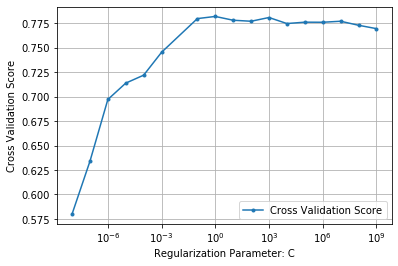

In [102]:
#THIS TAKES A LONG TIME TO RUN!

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])


for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

In [103]:
max_value_index = np.argmax(cross_validation_scores)
max_value_index

7

In [104]:
# From the graph and above code, it shows that  𝐶  = 1 is the best value for our logistic regression.

# Because we've taken into consideration 5 different splits of the data, we can be more confident that the model with 
# this hyperparameter value is the one that fits our data the best. 

In [105]:
# 5.2) What does your confusion matrix look like for your best model on the test set?

In [178]:
my_best_logreg = LogisticRegression(C=1, random_state=1)

In [179]:

my_best_logreg.fit(X_train, y_train)

my_best_logreg.score(X_train,y_train)


0.8247014870705442

In [180]:
my_best_logreg.score(X_test,y_test)

0.7890418986229124

In [181]:
from sklearn.metrics import confusion_matrix

preds = my_best_logreg.predict(X_test)
con_mat = confusion_matrix(y_test,preds)
con_mat


array([[1010,  419],
       [ 301, 1683]], dtype=int64)

In [110]:
# A confusion matrix is a summary of prediction results on a classification problem.
# The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

In [182]:
df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1'],
                 index = ['True 0','True 1'])

df_con_mat

,Predicted 0,Predicted 1
True 0,1010,419
True 1,301,1683


In [112]:
# 6) Create one new feature of your choice:

In [113]:
# 6.1) Explain your new feature and why you consider it will improve accuracy.

In [165]:
train_df.columns.values


array(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', ..., 'p_young', 'p_yummy',
       'Reviewer_Score'], dtype=object)

In [77]:
# After checking all the columns and data, for improving my model accuracy in this data frame, I decided to subtract the 
# "Review_Total_Positive_Word_Counts" from "Review_Total_Negative_Word_Counts". In this case, it will show that negative wights 
# is heavier or positive (for each review in each hotel). If the result of Review_weights become negative, it shows that negative
# word's weight is more than positive in a review. 
# So, the positive Review_weights will go to 1 classification (Reviewer_Score), and negatives will go to 0 classification.
# Also, the numbers will put a weight on them. May be it would help our model to be more accure!

In [166]:
train_df['Review_weights'] = train_df['Review_Total_Positive_Word_Counts'] - train_df['Review_Total_Negative_Word_Counts']
train_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score,Review_weights
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0,18.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-54.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,-4.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,279.0,8.2,55.0,1140.0,8.0,13.0,462.0,51.492733,-0.157371,4.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-47.0
13647,641.0,8.7,0.0,2130.0,5.0,3.0,338.0,51.542605,-0.007271,8.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,5.0
13648,359.0,9.3,45.0,1694.0,28.0,9.0,452.0,51.508236,-0.126196,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,-17.0
13649,704.0,8.3,16.0,2443.0,24.0,19.0,179.0,51.491959,-0.220096,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.0


In [167]:
list = train_df.columns.tolist() # list the columns in the df
list.insert(2588, list.pop(list.index('Reviewer_Score'))) # Assign new position 
train_df = train_df.reindex(columns= list)
train_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Review_weights,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,18.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-54.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-4.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,279.0,8.2,55.0,1140.0,8.0,13.0,462.0,51.492733,-0.157371,4.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-47.0,0.0
13647,641.0,8.7,0.0,2130.0,5.0,3.0,338.0,51.542605,-0.007271,8.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,5.0,1.0
13648,359.0,9.3,45.0,1694.0,28.0,9.0,452.0,51.508236,-0.126196,5.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-17.0,1.0
13649,704.0,8.3,16.0,2443.0,24.0,19.0,179.0,51.491959,-0.220096,2.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,8.0,0.0


In [168]:
test_df['Review_weights'] = test_df['Review_Total_Positive_Word_Counts'] - test_df['Review_Total_Negative_Word_Counts']
test_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score,Review_weights
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,788.0,8.5,40.0,2635.0,7.0,7.0,150.0,51.512763,-0.099716,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0
3409,377.0,8.5,27.0,1363.0,4.0,1.0,501.0,51.515864,-0.120063,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-23.0
3410,1427.0,8.8,0.0,4305.0,4.0,1.0,48.0,51.557696,-0.283526,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3411,1258.0,9.4,20.0,4204.0,31.0,3.0,62.0,51.502435,-0.000250,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0


In [169]:
# Moving the 'Review_Score' to the end column

list = test_df.columns.tolist() # list the columns in the df
list.insert(2588, list.pop(list.index('Reviewer_Score'))) # Assign new position 
test_df = test_df.reindex(columns= list)
test_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Review_weights,Reviewer_Score
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,0.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,788.0,8.5,40.0,2635.0,7.0,7.0,150.0,51.512763,-0.099716,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,0.0
3409,377.0,8.5,27.0,1363.0,4.0,1.0,501.0,51.515864,-0.120063,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.0,1.0
3410,1427.0,8.8,0.0,4305.0,4.0,1.0,48.0,51.557696,-0.283526,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
3411,1258.0,9.4,20.0,4204.0,31.0,3.0,62.0,51.502435,-0.000250,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0


In [170]:
# 6.2) Run the model from question 5 again. You will have to re-optimize your hyperparameters. 
# Has the accuracy score of your best model improved on the test set after adding the new feature you created?

In [171]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.Reviewer_Score

X_test = test_df.iloc[:,:-1]
y_test = test_df.Reviewer_Score

In [172]:
X_train_log2, X_validation_log2, y_train_log2, y_validation_log2 = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

In [173]:
my_logreg2 = LogisticRegression(random_state=1)
scores = cross_val_score(my_logreg2, X_train, y_train, cv = 5)
print(scores)

[0.78396192 0.7722446  0.79055291 0.77720777 0.78563576]


In [174]:
print(f"Average Score:{np.mean(scores)}")

Average Score:0.7819205922420256


In [134]:
# The average score in 5 validations has improved by 0.001

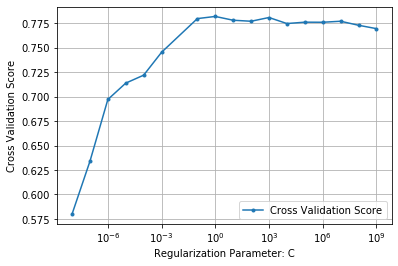

In [135]:

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])


for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

In [136]:
max_value_index = np.argmax(cross_validation_scores)
max_value_index

7

In [137]:
# but the best C is still 1

In [138]:
my_accure_logreg = LogisticRegression(C=1, random_state=1)

my_accure_logreg.fit(X_train, y_train)

my_accure_logreg.score(X_train,y_train)


0.8290235147608234

In [139]:
# The train accuracy has improved by almost 0.005

In [140]:
my_accure_logreg.score(X_test,y_test)

0.7890418986229124

In [141]:
# But the test accuracy remained constant!

In [142]:
preds = my_accure_logreg.predict(X_test)
con_mat = confusion_matrix(y_test,preds)
con_mat


array([[1002,  427],
       [ 293, 1691]], dtype=int64)

In [ ]:
# Unfortunatly, by adding this feature, I couldn't improve the test accuracy. May be I should check the other features for 
# improving it!!